In [1]:
import numpy as np
import pandas as pd

In [11]:
churn=pd.read_csv('churm.csv')

In [5]:
from sklearn.model_selection import cross_val_score, train_test_split

In [6]:
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [8]:
churm

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [47]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
train_df=pd.read_csv('titanic_train.csv')
y_train=train_df.Survived

In [105]:
test_df=pd.read_csv('titanic_test.csv')
a=test_df.PassengerId

In [106]:
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
test_df["Age"].fillna(train_df["Age"].median(), inplace=True)
train_df["Embarked"].fillna("S", inplace=True)
test_df["Fare"].fillna(train_df["Fare"].median(), inplace=True)

In [107]:
train_df = pd.concat(
    [
        train_df,
        pd.get_dummies(train_df["Pclass"], prefix="PClass"),
        pd.get_dummies(train_df["Sex"], prefix="Sex"),
        pd.get_dummies(train_df["SibSp"], prefix="SibSp"),
        pd.get_dummies(train_df["Parch"], prefix="Parch"),
        pd.get_dummies(train_df["Embarked"], prefix="Embarked"),
    ],
    axis=1,
)
test_df = pd.concat(
    [
        test_df,
        pd.get_dummies(test_df["Pclass"], prefix="PClass"),
        pd.get_dummies(test_df["Sex"], prefix="Sex"),
        pd.get_dummies(test_df["SibSp"], prefix="SibSp"),
        pd.get_dummies(test_df["Parch"], prefix="Parch"),
        pd.get_dummies(test_df["Embarked"], prefix="Embarked"),
    ],
    axis=1,
)

In [108]:
train_df.drop(
    [
        "Survived",
        "Pclass",
        "Name",
        "Sex",
        "SibSp",
        "Parch",
        "Ticket",
        "Cabin",
        "Embarked",
        "PassengerId",
    ],
    axis=1,
    inplace=True,
)
test_df.drop(
    [
        "Pclass",
        "Name",
        "Sex",
        "SibSp",
        "Parch",
        "Ticket",
        "Cabin",
        "Embarked",
        "PassengerId",
    ],
    axis=1,
    inplace=True,
)

In [109]:
test_df.drop('Parch_9',axis=1,inplace=True)

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
from sklearn.metrics import accuracy_score

In [112]:
from sklearn.metrics import confusion_matrix

In [113]:
X_train=train_df

In [114]:
train_df

,Age,Fare,PClass_1,PClass_2,PClass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,38.0,71.2833,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,26.0,7.9250,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,35.0,53.1000,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,35.0,8.0500,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
887,19.0,30.0000,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
888,28.0,23.4500,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
889,26.0,30.0000,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [115]:

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [143]:
titanic_train=pd.read_csv('titanic_train.csv')

In [144]:
titanic_test=pd.read_csv('titanic_test.csv')

In [155]:
churn=pd.read_csv('churn.csv')

In [156]:
churn

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [157]:
churn.drop(['State','Voice mail plan'],axis=1,inplace=True)

In [158]:
churn['International plan']=churn['International plan'].map({'Yes':1,'No':0})

In [159]:
churn

,Account length,Area code,International plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,192,415,0,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,68,415,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,28,510,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [161]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          2666 non-null   int64  
 1   Area code               2666 non-null   int64  
 2   International plan      2666 non-null   int64  
 3   Number vmail messages   2666 non-null   int64  
 4   Total day minutes       2666 non-null   float64
 5   Total day calls         2666 non-null   int64  
 6   Total day charge        2666 non-null   float64
 7   Total eve minutes       2666 non-null   float64
 8   Total eve calls         2666 non-null   int64  
 9   Total eve charge        2666 non-null   float64
 10  Total night minutes     2666 non-null   float64
 11  Total night calls       2666 non-null   int64  
 12  Total night charge      2666 non-null   float64
 13  Total intl minutes      2666 non-null   float64
 14  Total intl calls        2666 non-null   

In [163]:
y=churn.Churn.astype('int')

In [165]:
X=churn.drop('Churn',axis=1)

In [167]:
X.shape

(2666, 17)

In [171]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=17)

In [173]:
clf=DecisionTreeClassifier(random_state=17)

In [174]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=17)

In [175]:
pred=clf.predict(X_test)

In [181]:
cross_val_score(clf,X_train,y_train,cv=5).mean()

0.8965620564579719

In [182]:
from sklearn.neighbors import KNeighborsClassifier

In [183]:
knn=KNeighborsClassifier()

In [184]:
cross_val_score(knn,X_train,y_train,cv=5).mean()

0.8713767544551333

In [189]:
search=GridSearchCV(clf,{'max_depth':range(1,10),'max_features':range(1,10)})

In [212]:
best=search.fit(X_train,y_train).best_estimator_

In [204]:
searchK=GridSearchCV(knn,{'n_neighbors':range(1,100,5)},cv=5,n_jobs=-1)

In [205]:
p=searchK.fit(X_train,y_train)

In [206]:
p.best_score_,p.best_params_

(0.878341529153704, {'n_neighbors': 11})

In [214]:
from sklearn.tree import export_graphviz 
import matplotlib.pyplot as plt
from sklearn import tree
f

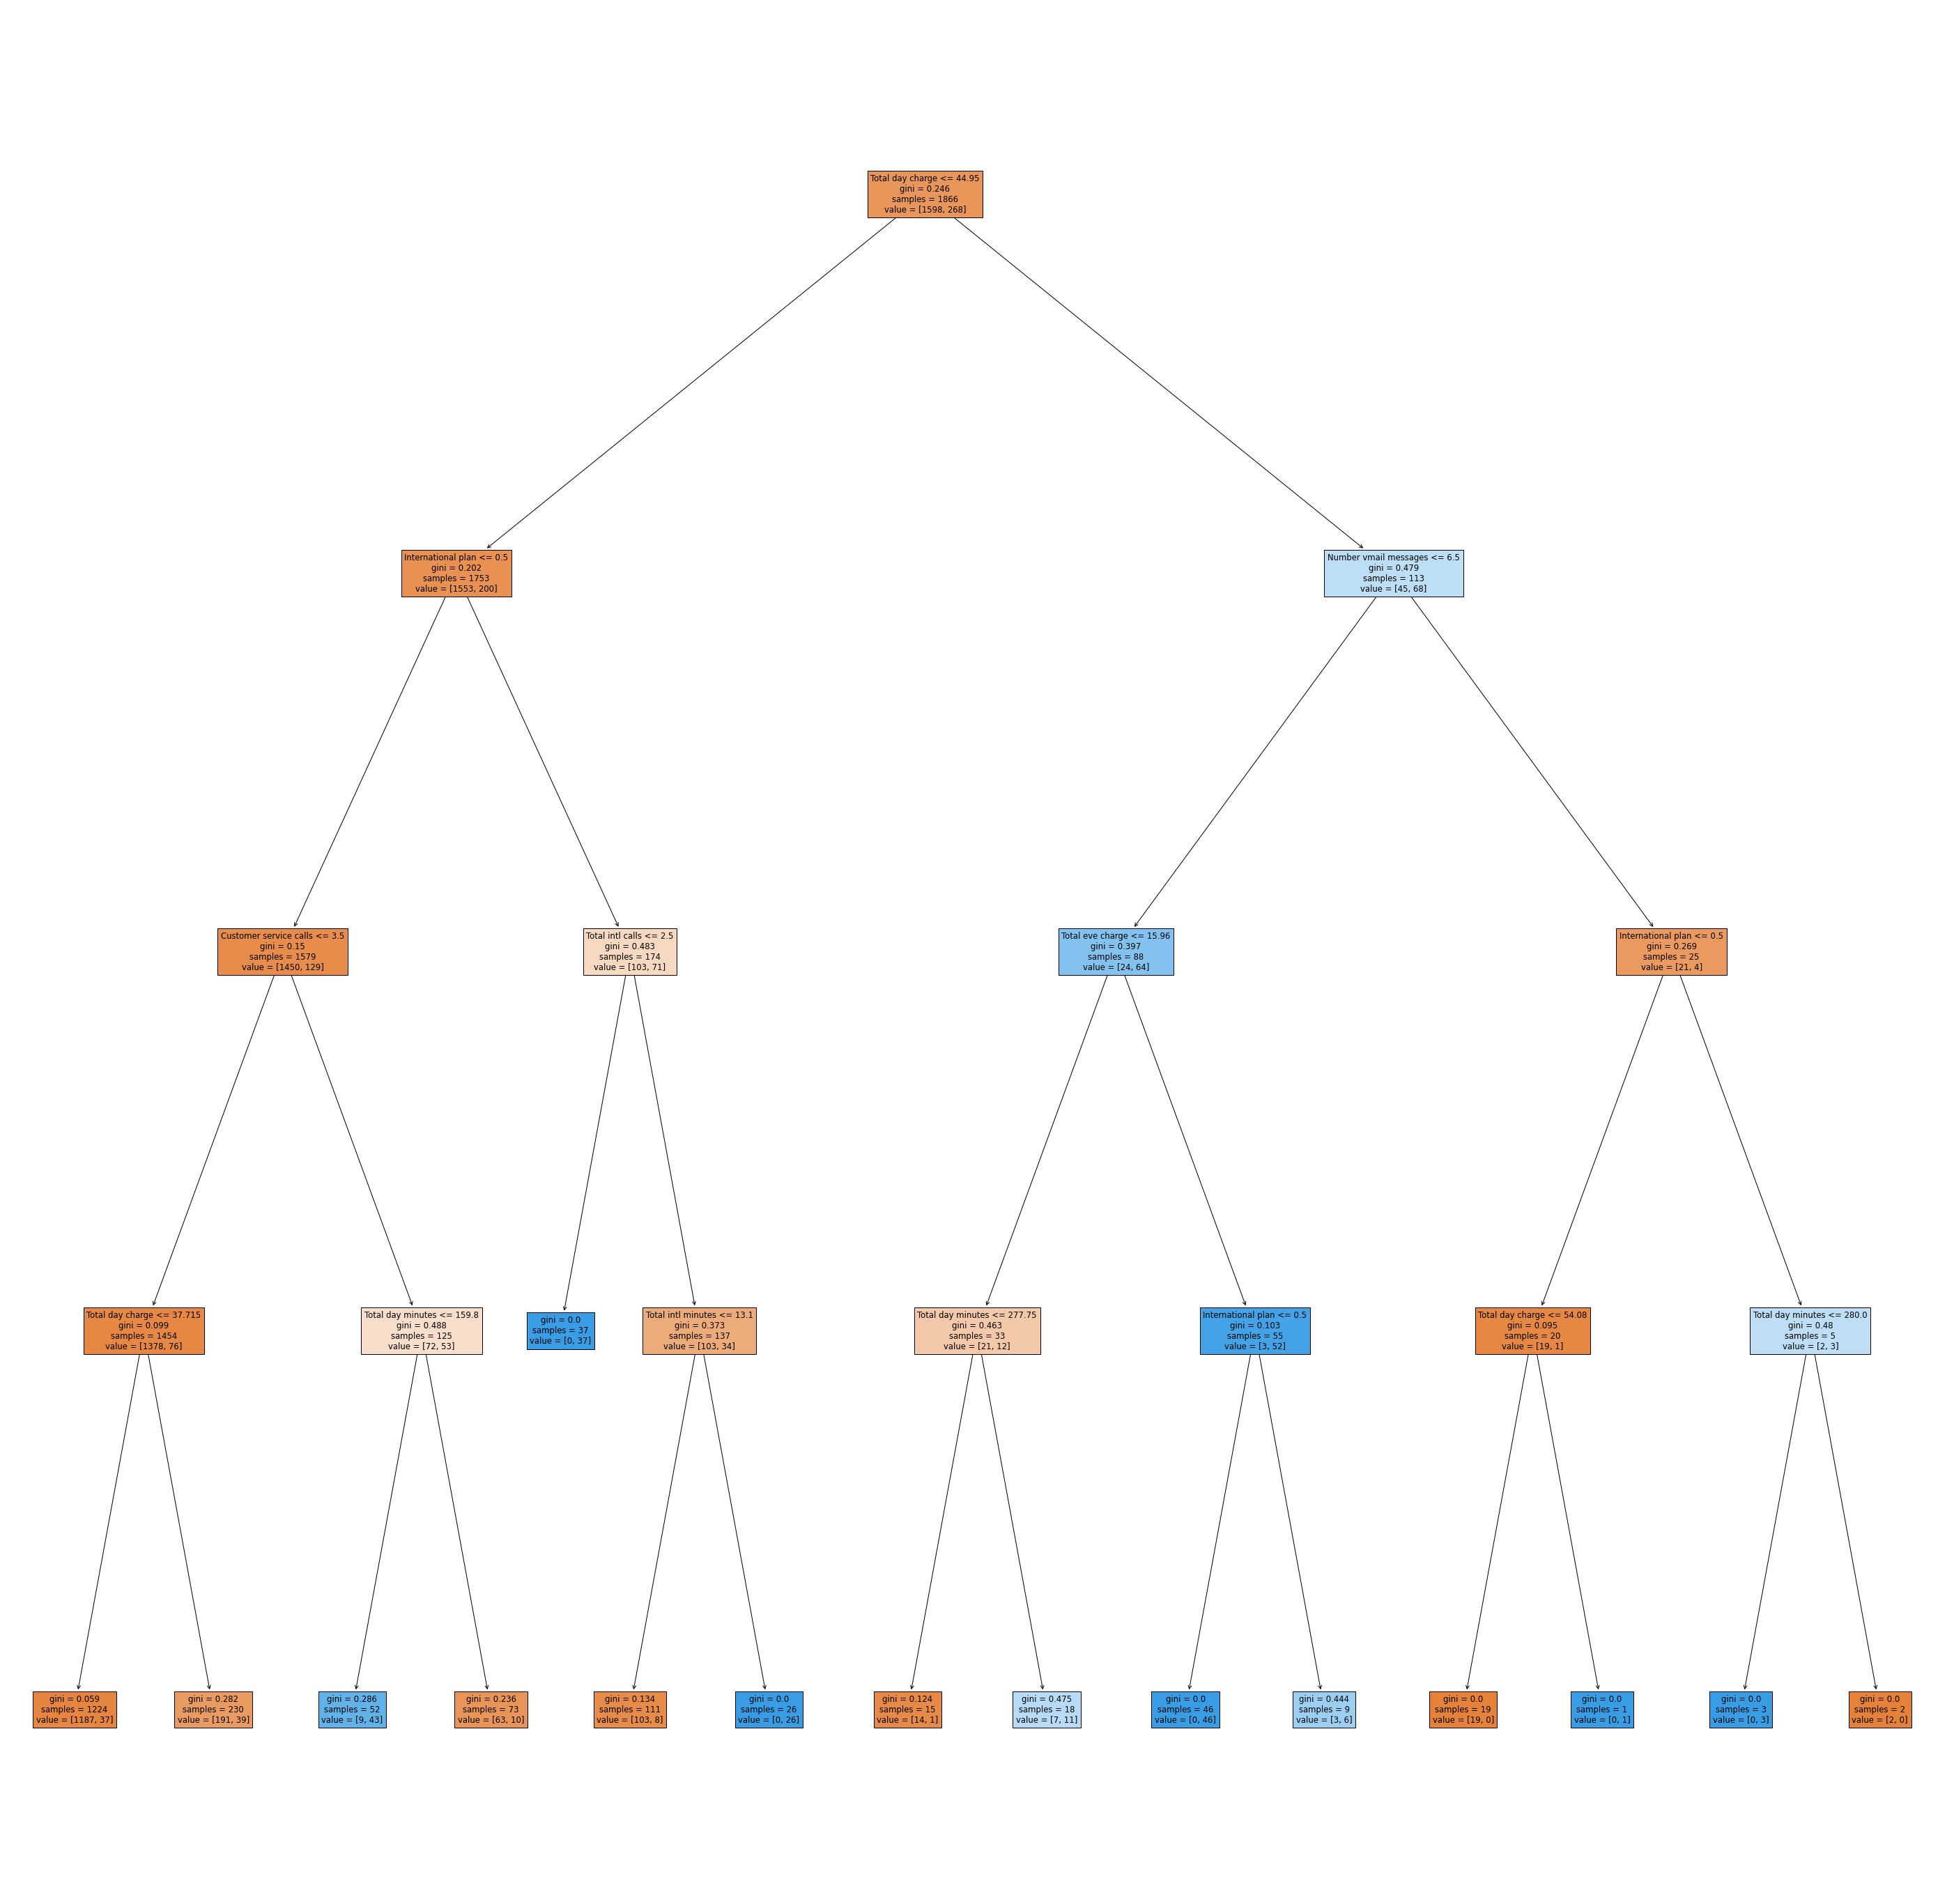

In [216]:
fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(best, feature_names=list(X),
                   filled=True)

In [220]:
# Создание датафрейма с dummy variables
from sklearn.preprocessing import LabelEncoder
def create_df(dic, feature_list):
    out = pd.DataFrame(dic)
    out = pd.concat([out, pd.get_dummies(out[feature_list])], axis = 1)
    out.drop(feature_list, axis = 1, inplace = True)
    return out

# Некоторые значения признаков есть в тесте, но нет в трейне и наоборот
def intersect_features(train, test):
    common_feat = list( set(train.keys()) & set(test.keys()))
    return train[common_feat], test[common_feat]

In [221]:
features = ['Внешность', 'Алкоголь_в_напитке',
            'Уровень_красноречия', 'Потраченные_деньги']

In [248]:
df_train = {}
df_train['Внешность'] = ['приятная', 'приятная', 'приятная', 'отталкивающая',
                         'отталкивающая', 'отталкивающая', 'приятная'] 
df_train['Алкоголь_в_напитке'] = ['да', 'да', 'нет', 'нет', 'да', 'да', 'да']
df_train['Уровень_красноречия'] = ['высокий', 'низкий', 'средний', 'средний', 'низкий',
                                   'высокий', 'средний']
df_train['Потраченные_деньги'] = ['много', 'мало', 'много', 'мало', 'много',
                                  'много', 'много']
df_train['Поедет'] = LabelEncoder().fit_transform(['+', '-', '+', '-', '-', '+', '+'])

df_train = create_df(df_train, features)
df_train


,Поедет,Внешность_отталкивающая,Внешность_приятная,Алкоголь_в_напитке_да,Алкоголь_в_напитке_нет,Уровень_красноречия_высокий,Уровень_красноречия_низкий,Уровень_красноречия_средний,Потраченные_деньги_мало,Потраченные_деньги_много
0,0,0,1,1,0,1,0,0,0,1
1,1,0,1,1,0,0,1,0,1,0
2,0,0,1,0,1,0,0,1,0,1
3,1,1,0,0,1,0,0,1,1,0
4,1,1,0,1,0,0,1,0,0,1
5,0,1,0,1,0,1,0,0,0,1
6,0,0,1,1,0,0,0,1,0,1


In [223]:
df_test = {}
df_test['Внешность'] = ['приятная', 'приятная', 'отталкивающая'] 
df_test['Алкоголь_в_напитке'] = ['нет', 'да', 'да']
df_test['Уровень_красноречия'] = ['средний', 'высокий', 'средний']
df_test['Потраченные_деньги'] = ['много', 'мало', 'много']
df_test = create_df(df_test, features)
df_test


,Внешность_отталкивающая,Внешность_приятная,Алкоголь_в_напитке_да,Алкоголь_в_напитке_нет,Уровень_красноречия_высокий,Уровень_красноречия_средний,Потраченные_деньги_мало,Потраченные_деньги_много
0,0,1,0,1,0,1,0,1
1,0,1,1,0,1,0,1,0
2,1,0,1,0,0,1,0,1


In [224]:
y = df_train['Поедет']
df_train, df_test = intersect_features(train=df_train, test=df_test)
df_train

,Уровень_красноречия_высокий,Алкоголь_в_напитке_да,Уровень_красноречия_средний,Алкоголь_в_напитке_нет,Потраченные_деньги_много,Внешность_приятная,Внешность_отталкивающая,Потраченные_деньги_мало
0,1,1,0,0,1,1,0,0
1,0,1,0,0,0,1,0,1
2,0,0,1,1,1,1,0,0
3,0,0,1,1,0,0,1,1
4,0,1,0,0,1,0,1,0
5,1,1,0,0,1,0,1,0
6,0,1,1,0,1,1,0,0


In [237]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=17)

In [242]:
clf.fit(df_train,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

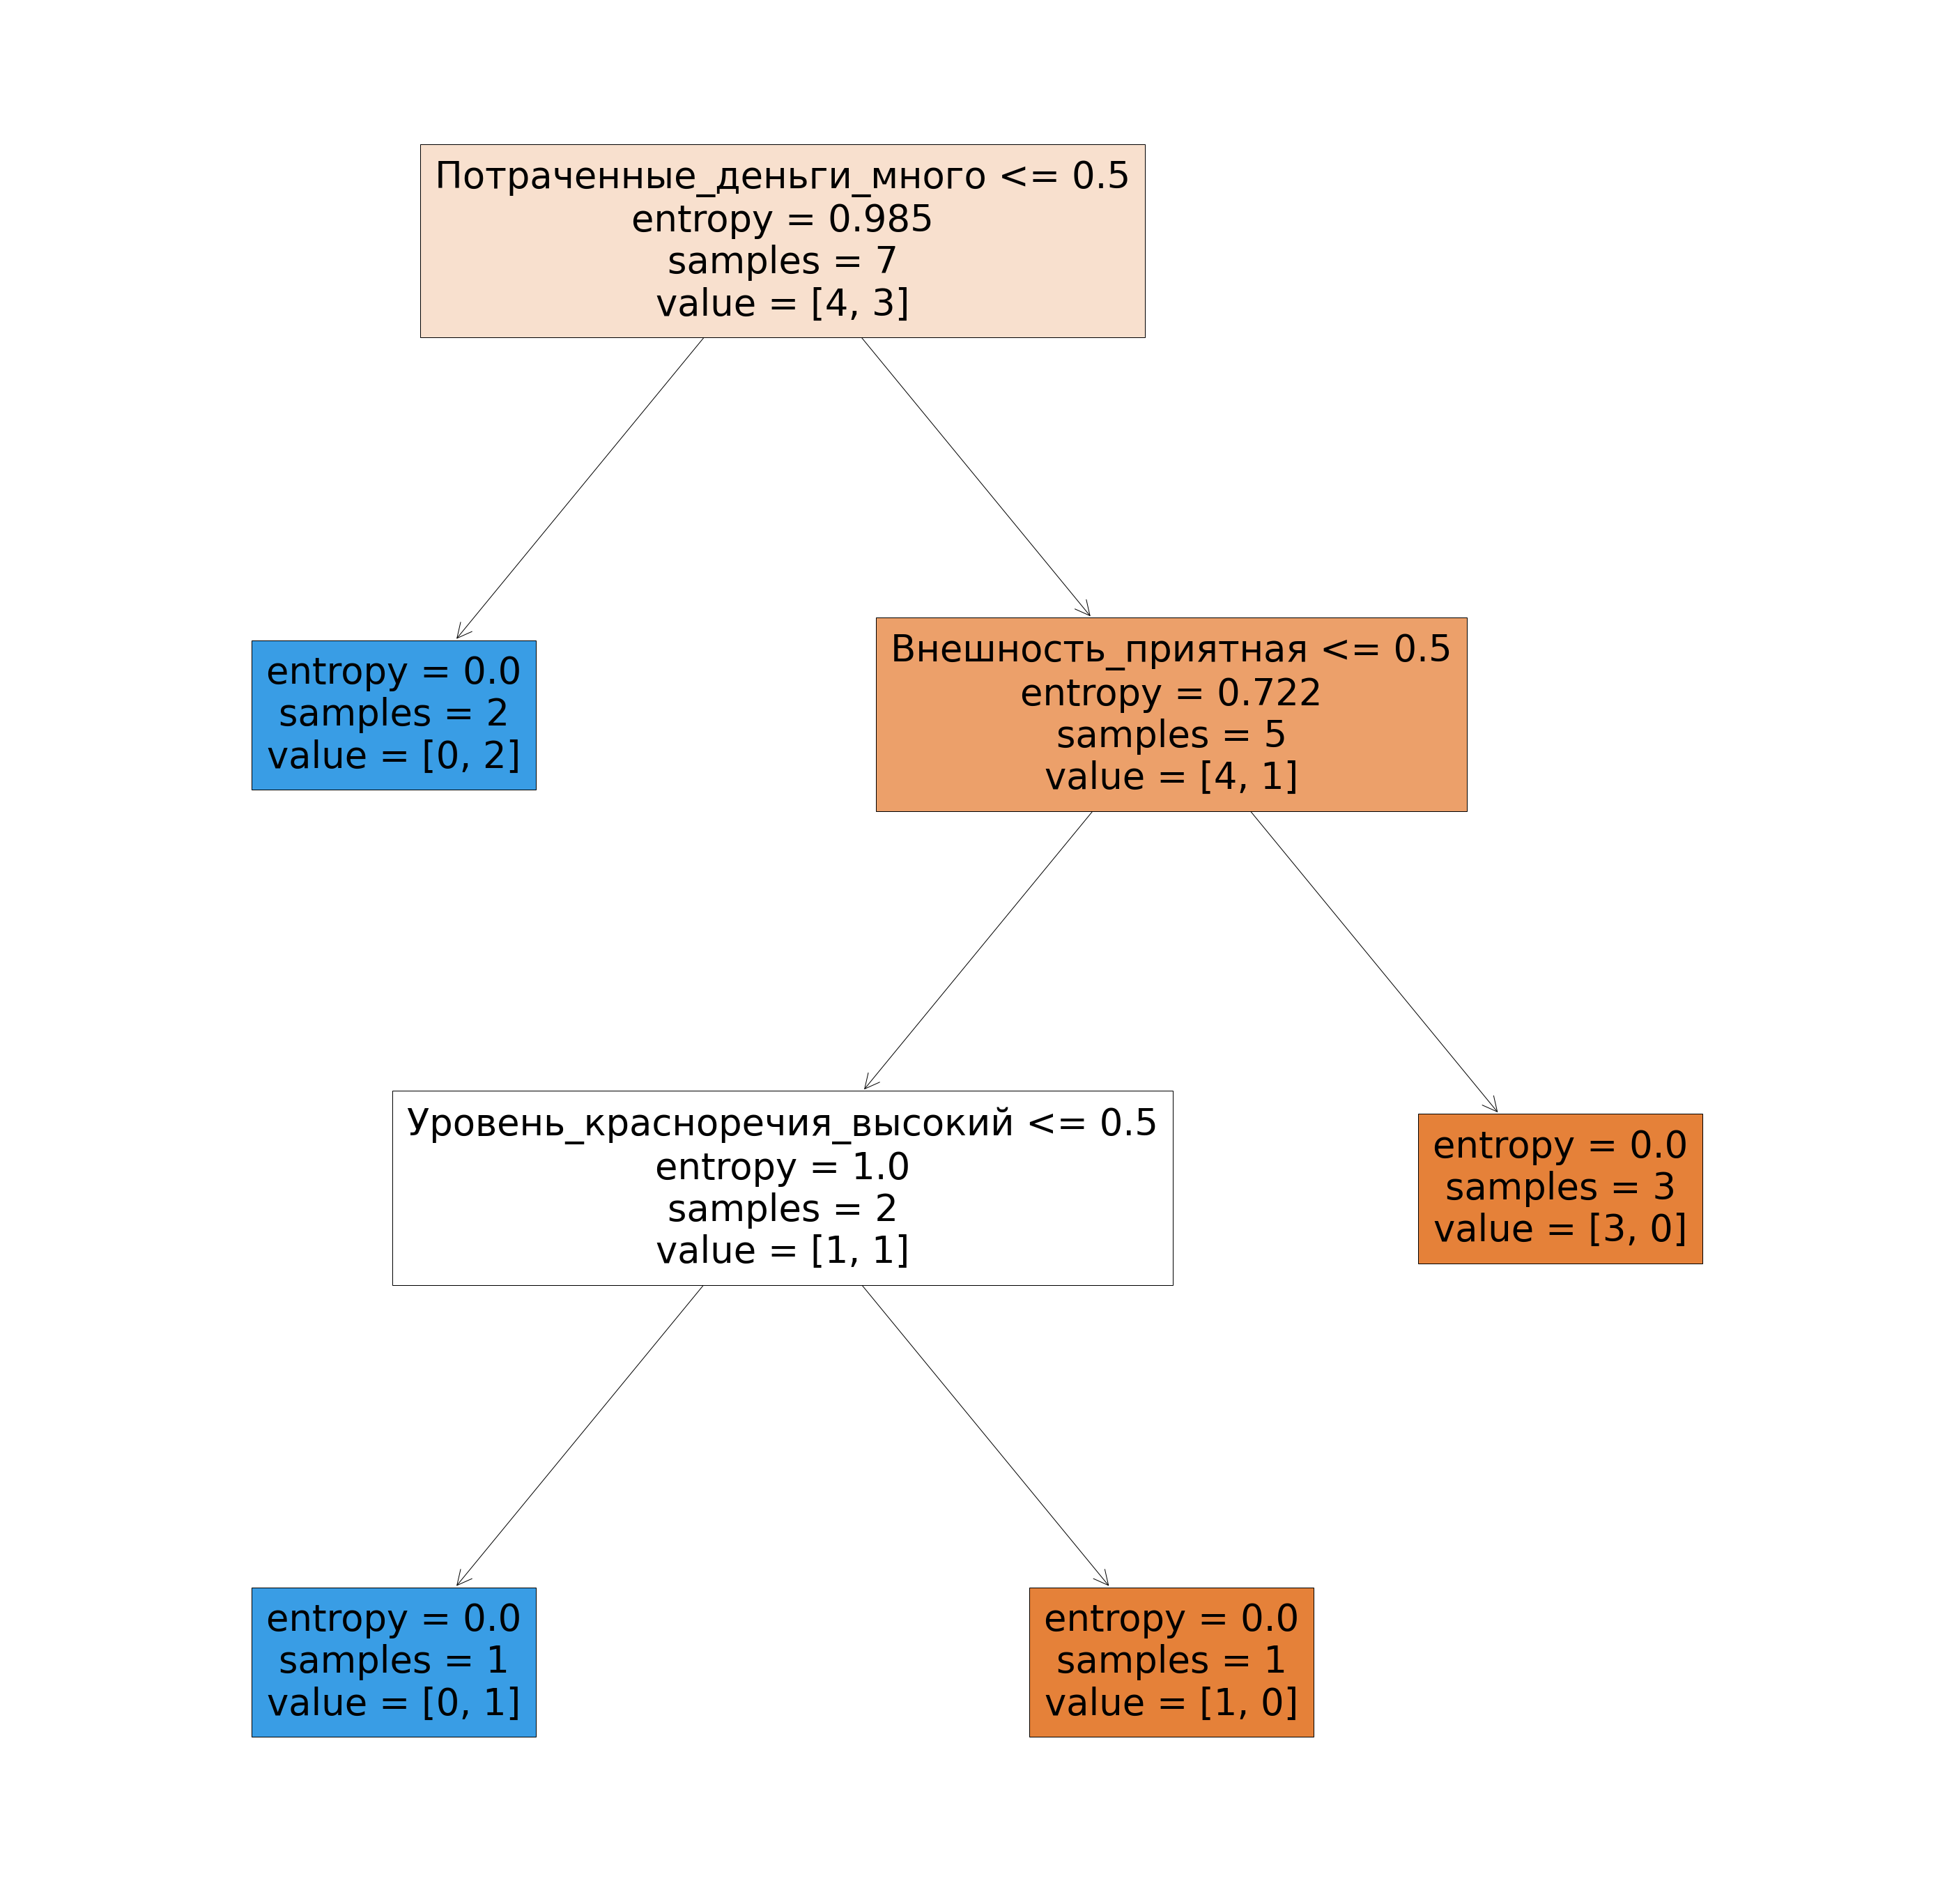

In [243]:
fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(clf, feature_names=list(df_train),
                   filled=True)

In [249]:
df_train[['Внешность_приятная','Поедет']]

,Внешность_приятная,Поедет
0,1,0
1,1,1
2,1,0
3,0,1
4,0,1
5,0,0
6,1,0


In [269]:
def entropy(p):
    if p==0 or p==1:
        return 0
    else: return -p*np.log2(p)-(1-p)*np.log2(1-p)

In [254]:
entropy(4/7)-((4/7*entropy(1/4))+(3/7*entropy(2/3)))

0.12808527889139443

In [255]:
entropy(1/4),entropy(2/3)

(0.8112781244591328, 0.9182958340544896)

In [273]:
entropy(9/20)-((13/20*entropy(5/13)+(7/20*entropy(1/7))))

0.16088518841412447

In [268]:
entropy(1/6)*4

0.0

In [270]:
from scipy.stats import entropy as ent

In [262]:
entropy([1/6, 1/6,1/6,1/6,1/6,1/6], base=2)

2.584962500721156

In [272]:
entropy(9/11)

0.6840384356390417

In [518]:
adult_train=pd.read_csv('adult.csv')

In [519]:
adult_test=pd.read_csv('adult_test.csv',names=list(adult_train))

In [520]:
adult_test=adult_test[~(adult_test.age=='|1x3 Cross validator')]

In [521]:
adult_train=adult_train.replace(' ?',np.nan)
adult_test=adult_test.replace(' ?',np.nan)

In [522]:
adult_test.dtypes

age                object
workclass          object
fnlwgt            float64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
country            object
salary             object
dtype: object

In [523]:
adult_test['age'] = adult_test['age'].astype(int)
adult_train['age'] = adult_train['age'].astype(int)
adult_test['fnlwgt'] = adult_test['fnlwgt'].astype(int)
adult_test['education-num'] = adult_test['education-num'].astype(int)
adult_test['capital-gain'] = adult_test['capital-gain'].astype(int)
adult_test['capital-loss'] = adult_test['capital-loss'].astype(int)
adult_test['hours-per-week'] = adult_test['hours-per-week'].astype(int)

In [524]:
for elem in list(adult_test):
    if adult_test[elem].dtype=='int32':
        adult_test[elem]=adult_test[elem].fillna(adult_test[elem].median())
    else:
        adult_test[elem]=adult_test[elem].fillna(adult_test[elem].value_counts().index.tolist()[0])
for elem in list(adult_test):
    if adult_test[elem].dtype=='int32':
        adult_test[elem]=adult_test[elem].fillna(adult_test[elem].median())
    else:
        adult_test[elem]=adult_test[elem].fillna(adult_test[elem].value_counts().index.tolist()[0])

In [525]:
adult_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16278,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16279,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16280,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [526]:
adult_train = pd.concat([adult_train, pd.get_dummies(adult_train['workclass'], 
                                                   prefix="workclass"),
                      pd.get_dummies(adult_train['education'], prefix="Education"),
                      pd.get_dummies(adult_train['marital-status'], prefix="Marital_Status"),
                      pd.get_dummies(adult_train['occupation'], prefix="Occupation"),
                      pd.get_dummies(adult_train['relationship'], prefix="Relationship"),
                      pd.get_dummies(adult_train['race'], prefix="Race"),
                      pd.get_dummies(adult_train['sex'], prefix="Sex"),
                      pd.get_dummies(adult_train['country'], prefix="Country")],
                     axis=1)

adult_test = pd.concat([adult_test, pd.get_dummies(adult_test['workclass'], prefix="workclass"),
                      pd.get_dummies(adult_test['education'], prefix="Education"),
                      pd.get_dummies(adult_test['marital-status'], prefix="Marital_Status"),
                      pd.get_dummies(adult_test['occupation'], prefix="Occupation"),
                      pd.get_dummies(adult_test['relationship'], prefix="Relationship"),
                      pd.get_dummies(adult_test['race'], prefix="Race"),
                      pd.get_dummies(adult_test['sex'], prefix="Sex"),
                      pd.get_dummies(adult_test['country'], prefix="Country")],
                     axis=1)

In [527]:
adult_train['isrich']=adult_train.salary==' >50K'
adult_test['isrich']=adult_test.salary==' >50K'

In [528]:
adult_test['isrich']=adult_test['isrich'].map({True:1,False:0})
adult_train['isrich']=adult_train['isrich'].map({True:1,False:0})

In [529]:
adult_test['Country_ Holand-Netherlands'] = np.zeros([adult_test.shape[0], 1])

In [541]:
adult_train.drop(['workclass', 'education', 'marital-status',
                 'occupation', 'relationship', 'race', 'sex', 'country','salary'],
                axis=1, inplace=True)
adult_test.drop(['workclass', 'education', 'marital-status',
                 'occupation', 'relationship', 'race', 'sex', 'country','salary'],
                axis=1, inplace=True)

KeyError: "['workclass' 'education' 'marital-status' 'occupation' 'relationship'\n 'race' 'sex' 'country'] not found in axis"

In [542]:
X_train=adult_train.drop(['isrich','salary'], axis=1)
y_train = adult_train['isrich']

X_test=adult_test.drop(['isrich','salary'], axis=1)
y_test = adult_test['isrich']

In [548]:
clf=DecisionTreeClassifier(max_depth=9,random_state=17)

In [549]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9, random_state=17)

In [552]:
accuracy_score(y_test,pred)

0.827590442847491